In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [24]:
#import and clean rpag data

rpag_data = pd.read_csv("rpag_data_2021.csv")

rpag_data.dropna(how="any", inplace=True)
rpag_data["reg_group"] = rpag_data["reg_group"].apply(lambda x: x.strip())

jan_aes_rpags = rpag_data[(rpag_data["reg_group"].str.contains("JF|JI", regex=True)) & (rpag_data["SubjectName"] == "Academic English Skills")].reset_index()
sept_aes_rpags = rpag_data[rpag_data["reg_group"].str.contains("SF|SI", regex=True) & (rpag_data["SubjectName"] == "Academic English Skills")].reset_index()
mar_aes_rpags = rpag_data[rpag_data["reg_group"].str.contains("MP") & (rpag_data["SubjectName"] == "Academic English Skills")].reset_index()

mar_aes_rpags.drop(np.where(mar_aes_rpags["name"] == "Gurpreet Kaur .")[0], inplace=True)

print(mar_aes_rpags["name"].value_counts())

jan_aes_rpags.drop(np.where(jan_aes_rpags["RPAG"] == "RPAG 1")[0], inplace=True, axis=0)
jan_aes_rpags.reset_index(drop=True, inplace=True)
jan_aes_rpags.drop(np.where(jan_aes_rpags["RPAG"] == "RPAG 2")[0], inplace=True, axis=0)

jan_aes_rpags["RPAG"] = jan_aes_rpags["RPAG"].map({"RPAG 3": "RPAG 1", "RPAG 4": "RPAG 2", "RPAG 5": "RPAG 3", "RPAG 6": "RPAG 4"})

all_rpags = pd.concat([sept_aes_rpags, jan_aes_rpags, mar_aes_rpags])

all_rpags.drop(columns="index", inplace=True)
all_rpags.drop(np.where(all_rpags["RPAG"] == "RPAG 6")[0], inplace=True, axis=0)


Ramsha Zia SIDDIQI             3
Catherine Elizabeth MUNDELL    3
Megan Louise ATTWOOD           3
Ka Mei WONG                    3
Name: name, dtype: int64


In [ ]:
#Get individual student AES RPAGS
aes_rpags = all_rpags[all_rpags["SubjectName"] == "Academic English Skills"]

pivot = aes_rpags.pivot(index="name", columns=["RPAG"], values="PAG1")
pivot = pivot.apply(lambda x: x.map({"Green": 4.0, "Amber": 3.0, "Pink": 2.0, "Red": 1.0}))
pivot.drop(columns="RPAG 5", inplace=True)
pivot.dropna(how="all", inplace=True)
pivot.fillna(0)

print(aes_rpags.head())

for i in pivot.iterrows():
  palette = {}
  j = 1
  for x in i[1].values:
    if x == 4:
      palette.update({"RPAG {}".format(j): "#32cd32"})
    elif x == 3:
      palette.update({"RPAG {}".format(j): "#ffbf00"})
    elif x == 2:
      palette.update({"RPAG {}".format(j): "#ff69b4"})
    else:
      palette.update({"RPAG {}".format(j): "#e32636"})
    j+=1
  
  sns.barplot(x=i[1].index, y=i[1].values, palette=palette)
  plt.title("{}\n RPAG Information".format(i[0]))
  plt.yticks([1,2,3,4], labels=["Red", "Pink", "Amber", "Green"])
  plt.show()


fig, axs = plt.subplots(3,1, figsize=(10, 12))
palette = {"Green": "#32cd32", "Amber": "#ffbf00", "Pink": "#ff69b4", "Red": "#e32636"}
sns.countplot(x="reg_group", data=aes_rpags, hue="PAG1", palette=palette, dodge=True, hue_order=["Green", "Amber", "Pink", "Red"], ax=axs[0])
axs[0].set_xlabel("Pathway")
axs[0].set_xticklabels(labels=all_rpags["reg_group"].unique(), rotation=45, ha="right")
axs[0].set_title("AES RPAG ratings by cohort")

sns.countplot(x="RPAG", data=aes_rpags, hue="PAG1", palette=palette, hue_order=["Green", "Amber", "Pink", "Red"], ax=axs[1])
axs[1].set_title("AES RPAG ratings by reporting period")

plt.tight_layout()
#plt.show()

In [ ]:
def get_rpag(student):
  data = pivot.loc[student]
  palette = {}
  j = 1
  for x in data.values:
    if x == 4:
      palette.update({"RPAG {}".format(j): "#32cd32"})
    elif x == 3:
      palette.update({"RPAG {}".format(j): "#ffbf00"})
    elif x == 2:
      palette.update({"RPAG {}".format(j): "#ff69b4"})
    else:
      palette.update({"RPAG {}".format(j): "#e32636"})
    j+=1
  
  sns.barplot(x=data.index, y=data.values, palette=palette)
  plt.yticks([1,2,3,4], labels=["Red", "Pink", "Amber", "Green"])
  plt.show()

get_rpag("Ziqi ZHANG")

print(pivot.index)


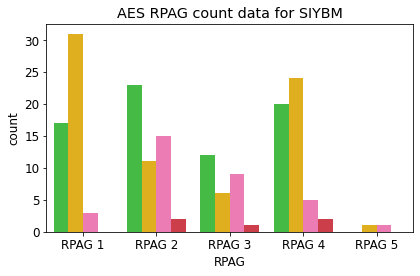

<Figure size 432x288 with 0 Axes>

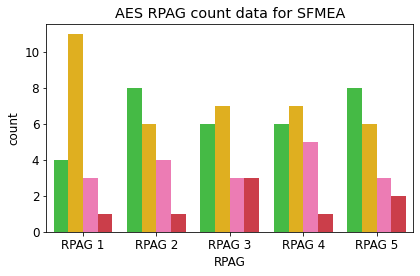

<Figure size 432x288 with 0 Axes>

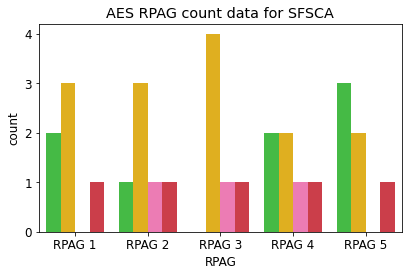

<Figure size 432x288 with 0 Axes>

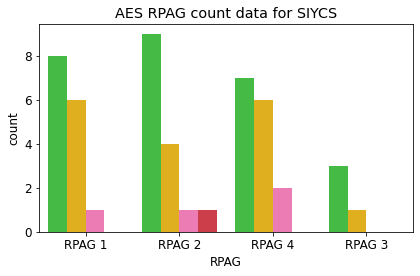

<Figure size 432x288 with 0 Axes>

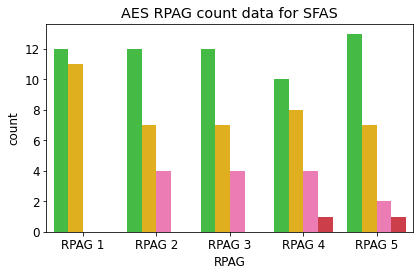

<Figure size 432x288 with 0 Axes>

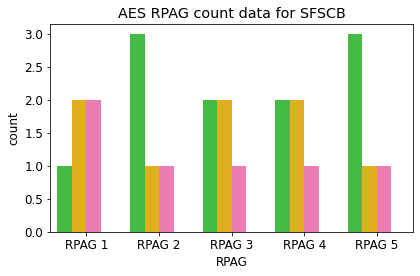

<Figure size 432x288 with 0 Axes>

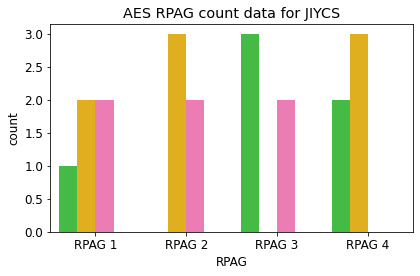

<Figure size 432x288 with 0 Axes>

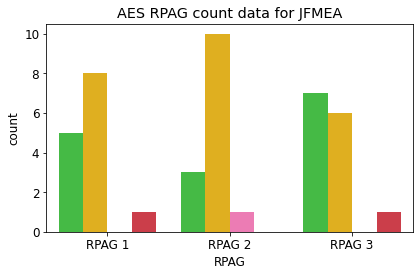

<Figure size 432x288 with 0 Axes>

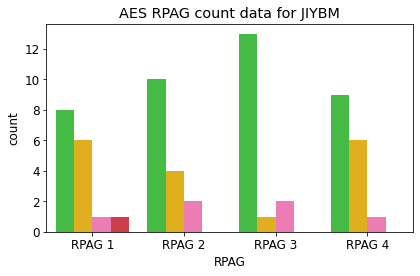

<Figure size 432x288 with 0 Axes>

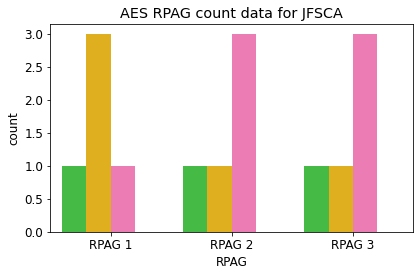

<Figure size 432x288 with 0 Axes>

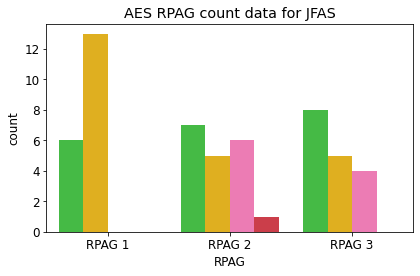

<Figure size 432x288 with 0 Axes>

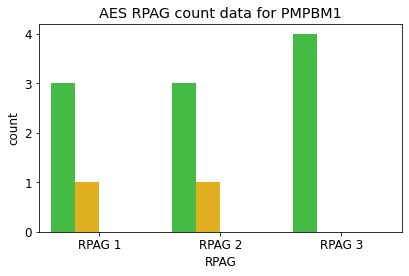

<Figure size 432x288 with 0 Axes>

In [25]:
#aes rpag overview
aes_rpags["num_equiv"] = aes_rpags["PAG1"].map({"Green": 4, "Amber": 3, "Pink": 2, "Red": 1})
matplotlib.rcParams.update({'font.size': 12})
new_palette = {"Green": "#32cd32", "Amber": "#ffbf00", "Pink": "#ff69b4", "Red": "#e32636"}
for group in aes_rpags["reg_group"].unique():
  fig, ax = plt.subplots(figsize=(6,4))
  sns.countplot(x="RPAG", data=aes_rpags[aes_rpags["reg_group"] == group], hue="PAG1", hue_order=["Green", "Amber", "Pink", "Red"], palette=new_palette)
  plt.legend().remove()
  plt.title("AES RPAG count data for {}".format(group))
  plt.tight_layout()
  plt.savefig("charts/{}.png".format(group))
  plt.show()
  plt.clf()


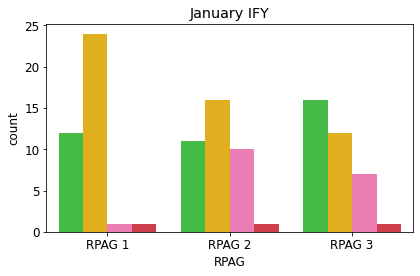

<Figure size 432x288 with 0 Axes>

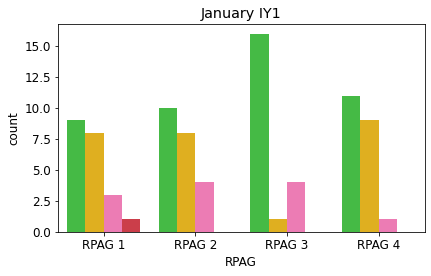

NameError: name 'sept_rpags' is not defined

<Figure size 432x288 with 0 Axes>

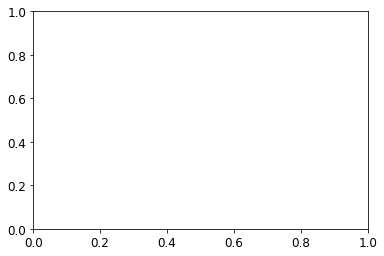

In [23]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=jan_aes_rpags[jan_aes_rpags["reg_group"].str.contains("JF")], x="RPAG", hue="PAG1", palette=new_palette, hue_order=["Green", "Amber", "Pink", "Red"])
plt.title("January IFY")
plt.tight_layout()
plt.legend().remove()
plt.savefig("charts/jan_ify_rpags.png")
plt.show()
plt.clf()

fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=jan_aes_rpags[jan_aes_rpags["reg_group"].str.contains("JI")], x="RPAG", hue="PAG1", palette=new_palette, hue_order=["Green", "Amber", "Pink", "Red"])
plt.title("January IY1")
plt.tight_layout()
plt.legend().remove()
plt.savefig("charts/jan_iy1_rpags.png")
plt.show()
plt.clf()

fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=sept_aes_rpags[(sept_rpags["reg_group"].str.contains("SI")) & (sept_aes_rpags["RPAG"] != "RPAG 6")], x="RPAG", hue="PAG1", palette=new_palette, hue_order=["Green", "Amber", "Pink", "Red"])
plt.title("September IY1")
plt.tight_layout()
plt.legend().remove()
plt.savefig("charts/sept_iy1_rpags.png")
plt.show()
plt.clf()

fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=sept_aes_rpags[sept_aes_rpags["reg_group"].str.contains("SF")], x="RPAG", hue="PAG1", palette=new_palette, hue_order=["Green", "Amber", "Pink", "Red"])
plt.title("September IFY")
plt.tight_layout()
plt.legend().remove()
plt.savefig("charts/sept_ify_rpags.png")
plt.show()
plt.clf()

fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=mar_aes_rpags[mar_aes_rpags["reg_group"].str.contains("PM")], x="RPAG", hue="PAG1", palette=new_palette, hue_order=["Green", "Amber", "Pink", "Red"])
plt.title("March PMP")
plt.tight_layout()
plt.legend().remove()
plt.savefig("charts/mar_pmp_rpags.png")
plt.show()
plt.clf()
